Aayush Bhurtel

University of Cumberlands

Dr. Christian Youngblood

MSAI 511 B51

4/06/2025

### Which Public Health Factors have the Greatest Impact on Life Expectancy?
Life expectancy is the crucial metric for evaluating population health. It provides the average number of years that a group of people in a population is estimated to live. This factor is estimated based on various public health factors. The task of this project is to determine what are the various factors which can help in determining life expectancy. <br>

Data Source:
The raw data was extracted from Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status. The various features of the dataset include:
Features include:

* Country
* HIV\AIDS
* Measles
* Year
* Hepatitis B
* Body Mass Index (BMI)
* Life expectancy
* Polio
* Status
* Adult mortality
* Diphtheria
* Prevalence for malnutrition 5-9
* Infant mortality
* Gross Domestic Product (GDP)
* Education
* Alcohol consumption
* Population
* Total expenditure on health
* Expenditure on health (%)
* Prevalence for malnutrition 1-19
* Status

Dataset consist of 2938 records with 22 columns.

Task 1:
Read the raw data from the source file in Python.

First lets import all the necessy libraries and we keep on adding these libraries in later stages according to necessary.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/aayushbhurtel/MachineLearning/refs/heads/main/Life_Expectancy_Data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [26]:
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Perform feature enginnering:

1. Population size: Create a population range that includes three categories:
  1. Small -  a population between 1,000 and 29,999,
  2. Medium -  a population between 30,000 and 99,999, and
  3. Large -  a population of 100,000 or more.

First, lets clean Title for each columns. Remove leading or trailing spaces, replace spaces between with underscore and convert all titles to lowercase.
  

In [27]:
df.columns = df.columns.str.strip().str.lower().str.replace('  ', ' ').str.replace(' ', '_')
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

lets check if population has NaN values and if it does then fill it with median. Otherwise use bins to categorize each category according to rules.

In [28]:
df['population'].isna().sum()

np.int64(652)

Looks like there are 652 missing values in popluation. Lets replace them with median values. Use bins to cateogorize popluation according to rules.

In [29]:
df['population'] = df['population'].fillna(df['population'].median())
df['population_range'] = pd.cut(df['population'], bins=[0, 29999, 99999, np.inf], labels=['Small', 'Medium', 'Large'])
df['population_range']

,population_range
0,Large
1,Large
2,Large
3,Large
4,Large
...,...
2933,Large
2934,Large
2935,Large
2936,Large


Lifestyle – Create a lifestyle feature that combines alcohol consumption and BMI.

I am going to create a composite score by combining alcohol and BMI index by multiplying both features.

In [30]:
df['lifestyle'] = df['alcohol'] * df['bmi']

df['lifestyle']

,lifestyle
0,0.191
1,0.186
2,0.181
3,0.176
4,0.172
...,...
2933,118.156
2934,108.402
2935,116.509
2936,44.548


Economy – Create an economy feature that combines population and GDP. <br>
The most straightforward way to combine these is by calculating the GDP per capita, which measures the average income per person:

In [31]:
df['economy'] = df['gdp'] * df['population']
df['economy']

,economy
0,1.971086e+10
1,2.007083e+08
2,2.004633e+10
3,2.476810e+09
4,1.892519e+08
...,...
2933,5.805675e+09
2934,5.727592e+09
2935,7.198650e+06
2936,6.783921e+09


Death Ratio – Determine the death ratio between adult and infant mortality. <br>
death ratio is a metric indicating the relationship between adult and infant mortality. Adding replace method to replace NaN values with 0 if the infant death is zero.

In [32]:
df['death_ratio'] = df['adult_mortality'] / df['infant_deaths'].replace(0, np.nan)
df['death_ratio']

,death_ratio
0,4.241935
1,4.234375
2,4.060606
3,3.942029
4,3.873239
...,...
2933,26.777778
2934,27.500000
2935,2.920000
2936,27.440000


# Task 2:
Perform data cleaning by either removing any fragmented observations or by imputing missing values as necessary. Generate scatter plots between each predictor with the target variable to check the linear relationship and apply data transformations like log transform, if necessary.<br>
First, we will use `isnull()` function to find the missing data in the dataset.

In [33]:
df.isnull()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,population_range,lifestyle,economy,death_ratio
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Looks like there is much of a missing values in our dataset. Lets calculate the sum of null values in our dataset to figure out exactly how many missing values are there. I am going to use isna().sum()

In [34]:
df.isna().sum()

,0
country,0
year,0
status,0
life_expectancy,10
adult_mortality,10
infant_deaths,0
alcohol,194
percentage_expenditure,0
hepatitis_b,553
measles,0


I can see that 10 records for Life Expectancy is NuLL, lets expore that.

In [35]:
df_nulls = df[df['life_expectancy'].isna()]
df_nulls

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,population_range,lifestyle,economy,death_ratio
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,NaN,1386542.0,0.1,0.1,NaN,NaN,Large,0.828,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,722.756650,1386542.0,2.7,2.6,0.721,12.7,Large,0.584,1.002132e+09,NaN
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,3617.752354,1386542.0,0.1,0.1,NaN,0.0,Large,0.816,5.016166e+09,NaN
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,NaN,1386542.0,NaN,NaN,NaN,NaN,Large,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,136.183210,1386542.0,0.1,0.1,NaN,9.6,Large,0.873,1.888237e+08,NaN
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,NaN,1386542.0,0.1,0.1,NaN,NaN,Large,0.773,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,1932.122370,292.0,0.1,0.1,0.779,14.2,Small,NaN,5.641797e+05,NaN
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,NaN,1386542.0,3.7,3.6,0.749,13.4,Large,44.408,NaN,NaN
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,NaN,1386542.0,NaN,NaN,NaN,15.1,Large,NaN,NaN,NaN
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,3542.135890,1819.0,0.2,0.1,NaN,0.0,Small,0.793,6.443145e+06,NaN


From the above table, we can see that 10 countries have no record for *life expectancy* or other crucial columns from 2013, so I have removed those rows from this dataset. Removing them would be the best way forward since there is no way to fill or impute those values.

In [36]:
df = df.drop(df[df['life_expectancy'].isna()].index)
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,population_range,lifestyle,economy,death_ratio
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,Large,0.191,1.971086e+10,4.241935
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,Large,0.186,2.007083e+08,4.234375
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,Large,0.181,2.004633e+10,4.060606
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,Large,0.176,2.476810e+09,3.942029
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,Large,0.172,1.892519e+08,3.873239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,454.366654,12777511.0,9.4,9.4,0.407,9.2,Large,118.156,5.805675e+09,26.777778
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,453.351155,12633897.0,9.8,9.9,0.418,9.5,Large,108.402,5.727592e+09,27.500000
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,57.348340,125525.0,1.2,1.3,0.427,10.0,Large,116.509,7.198650e+06,2.920000
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,548.587312,12366165.0,1.6,1.7,0.427,9.8,Large,44.548,6.783921e+09,27.440000


Lets impute numerical values using a median.

In [37]:
df.fillna(df.median(numeric_only=True), inplace=True)

Lets recheck the null values in our dataset

In [38]:
df.isna().sum()

,0
country,0
year,0
status,0
life_expectancy,0
adult_mortality,0
infant_deaths,0
alcohol,0
percentage_expenditure,0
hepatitis_b,0
measles,0


Now there are no NaN values in our dataset. Let move on to our next analysis.

Generate scatter plots between each predictor with the target variable to check the linear relationship and apply data transformations like log transform, if necessary.

In Machine Learning, Variables are categorized into two types:
Predictor: Input features which are used to predit the outcome

Target: Dependent variable which we are trying to predict.

In our case, Life expectancy is a target variable and rest all others are predictor variable.
Lets generate Scattor Plot between each predictor and target variable to see the linear relationship.



In [39]:
print(df.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'population_range', 'lifestyle', 'economy', 'death_ratio'],
      dtype='object')


Lets start with *Life Expenctancy* vs *Adult Mortality*

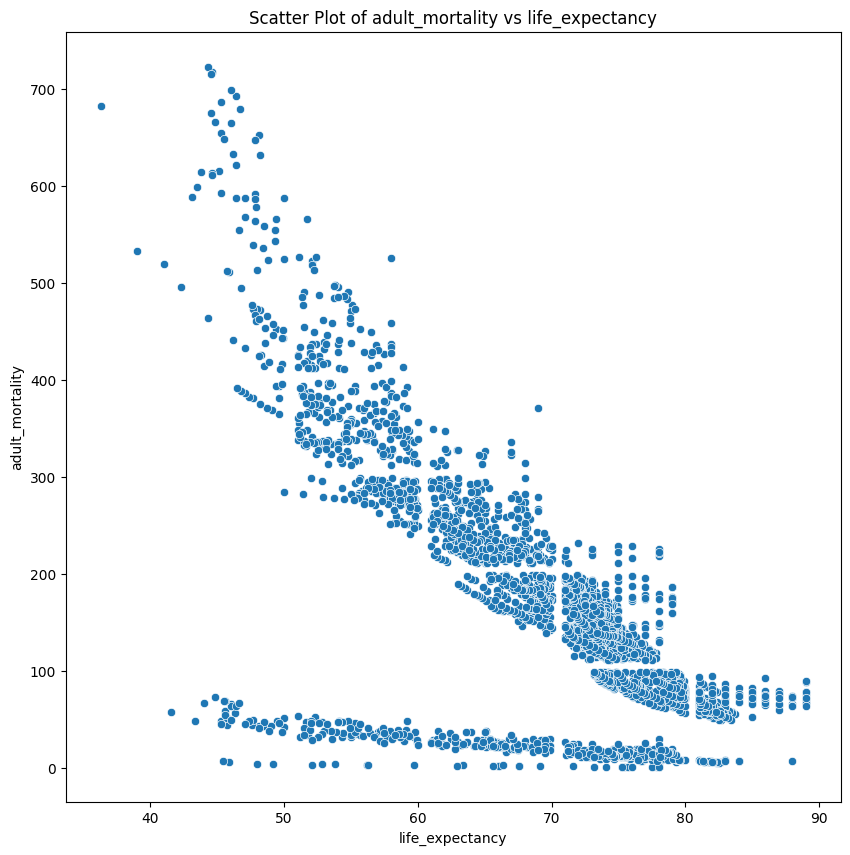

In [40]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['life_expectancy'], y=df['adult_mortality'])
plt.xlabel('life_expectancy')
plt.ylabel('adult_mortality')
plt.title('Scatter Plot of adult_mortality vs life_expectancy')
plt.show()

Let's create a function that creates all the scatter-plot for our feature and predictor.

I just realized that *Economy* feature is in exponent form so lets try to transform it using log and plot it again.



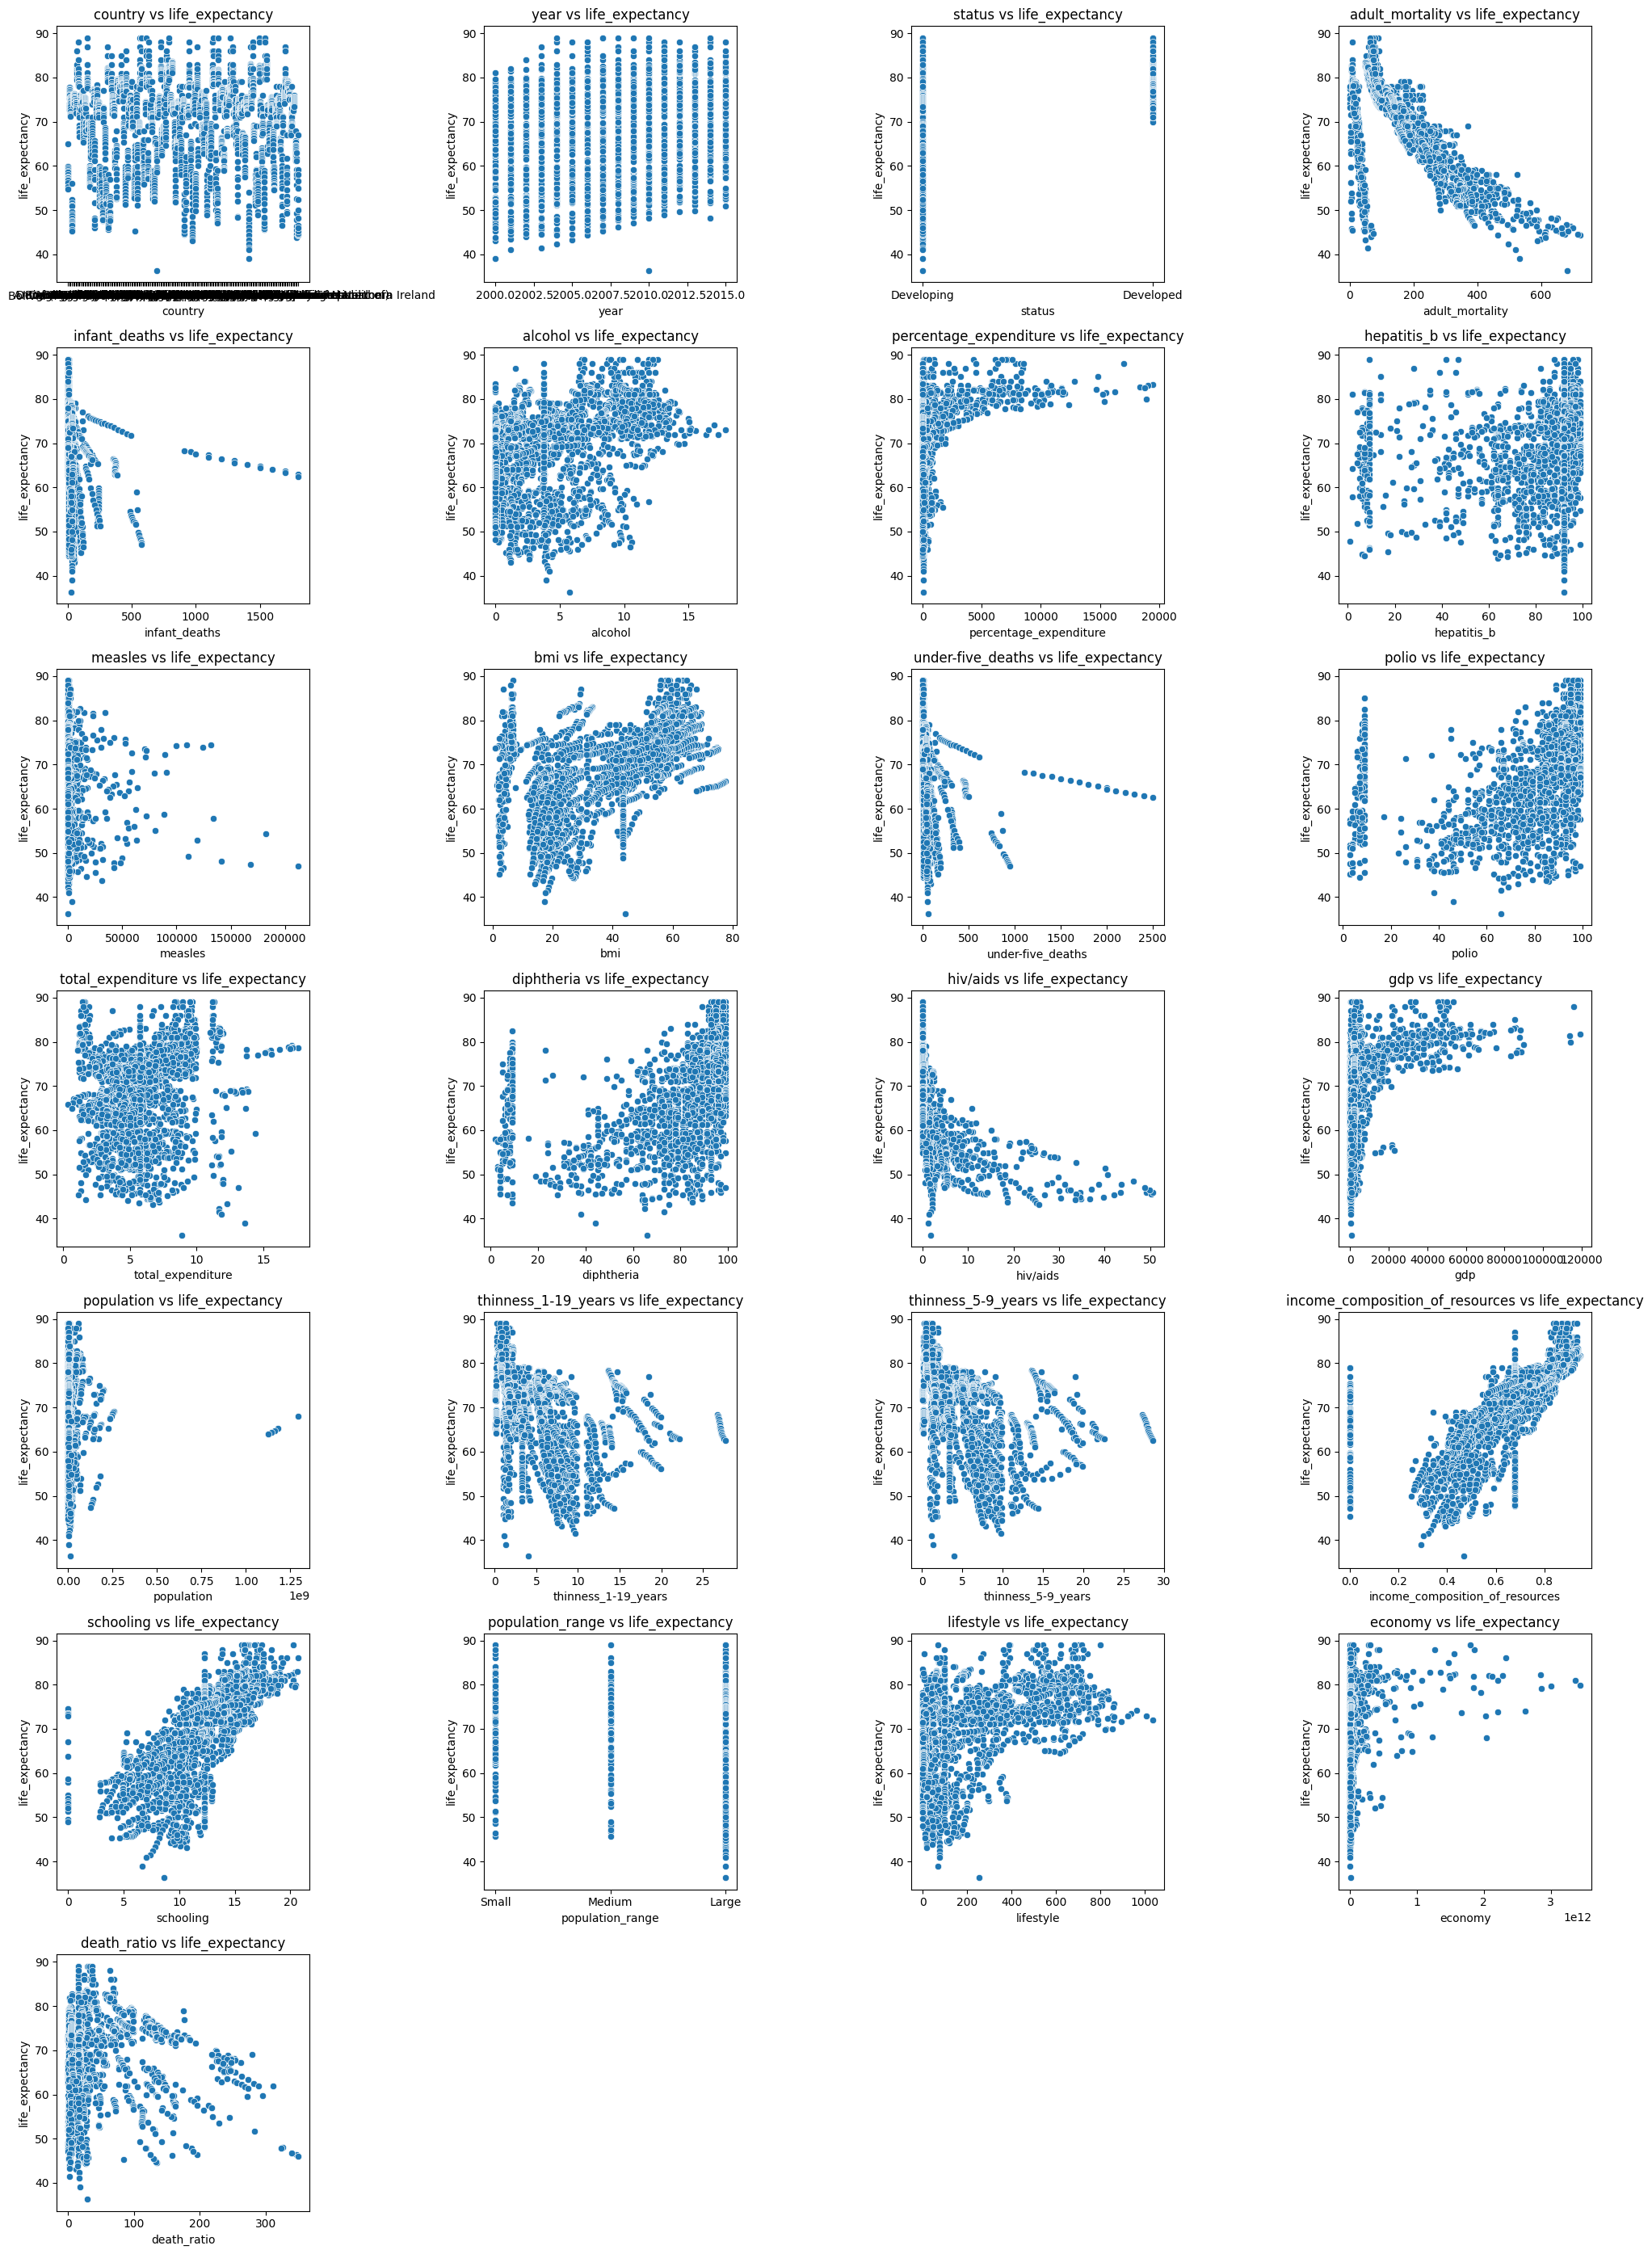

In [41]:
def scatter_plots_grid(df, predictor, features):
    n = len(features)
    rows = (n // 4) + 1  # Arrange plots in a grid (4 per row)

    fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 4))  # Adjust figure size
    axes = axes.flatten()  # Flatten axes for easy iteration

    for i, feature in enumerate(features):
        sns.scatterplot(x=df[feature], y=df[predictor], ax=axes[i])
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(predictor)
        axes[i].set_title(f'{feature} vs {predictor}')

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

predictor = 'life_expectancy'  # Target variable
features = ['country', 'year', 'status', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'population_range', 'lifestyle', 'economy', 'death_ratio']

scatter_plots_grid(df, predictor, features)

Generate a correlation heat map to assess multicollinearity with the threshold set as 0.75. All variables above 0.75 need to be dropped.

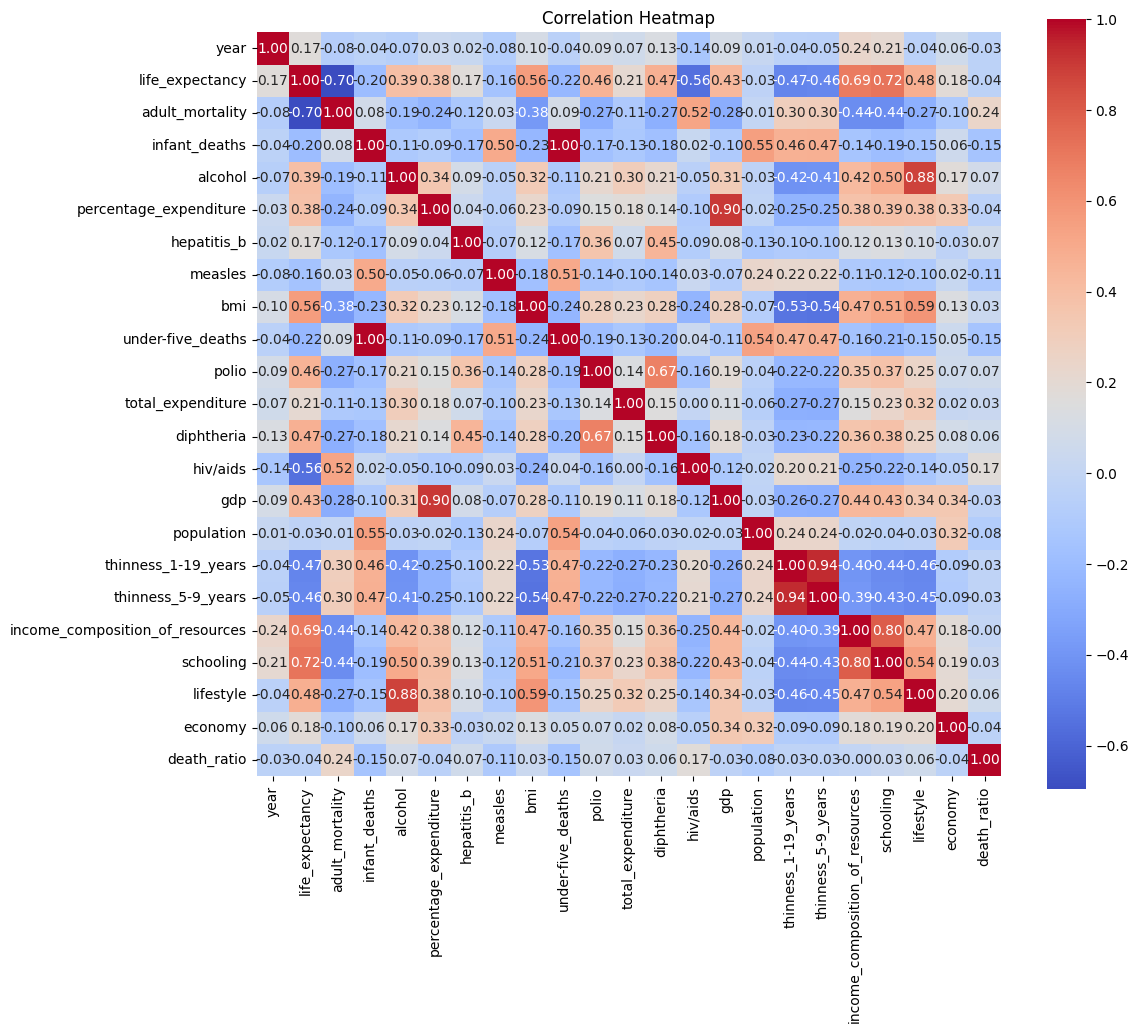

In [42]:
numeric_df = df.select_dtypes(include='number')

# Step 1: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 2: Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Select upper triangle of correlation matrix
upper_matrix = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Step 4: Find features with correlation > 0.75
feature_to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.75)]

# Step 5: Drop features
df_reduced = df.drop(columns=feature_to_drop)

In [43]:
print(feature_to_drop)

['under-five_deaths', 'gdp', 'thinness_5-9_years', 'schooling', 'lifestyle']


We’ll generate box-whisker plots and eliminate outliers using the IQR method (Interquartile Range), which is commonly used for detecting outliers in boxplots.

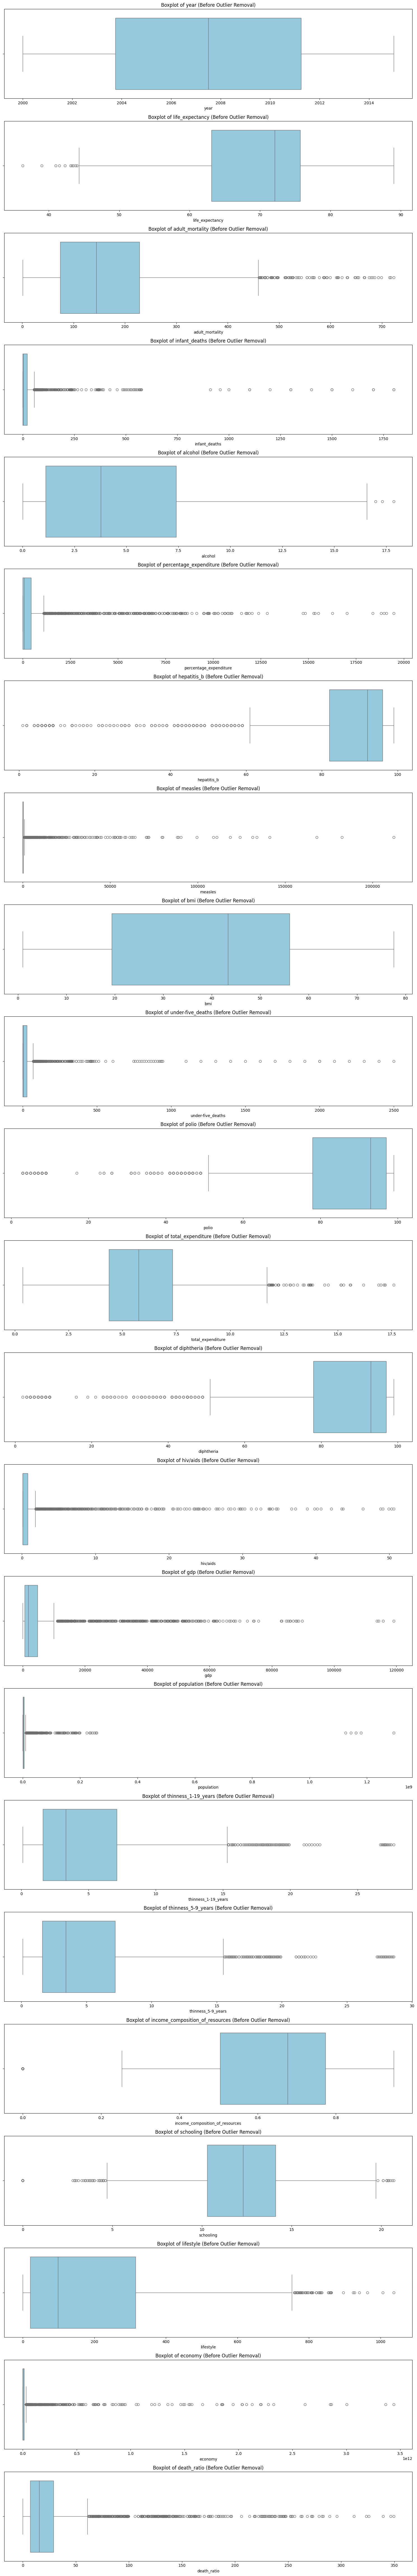

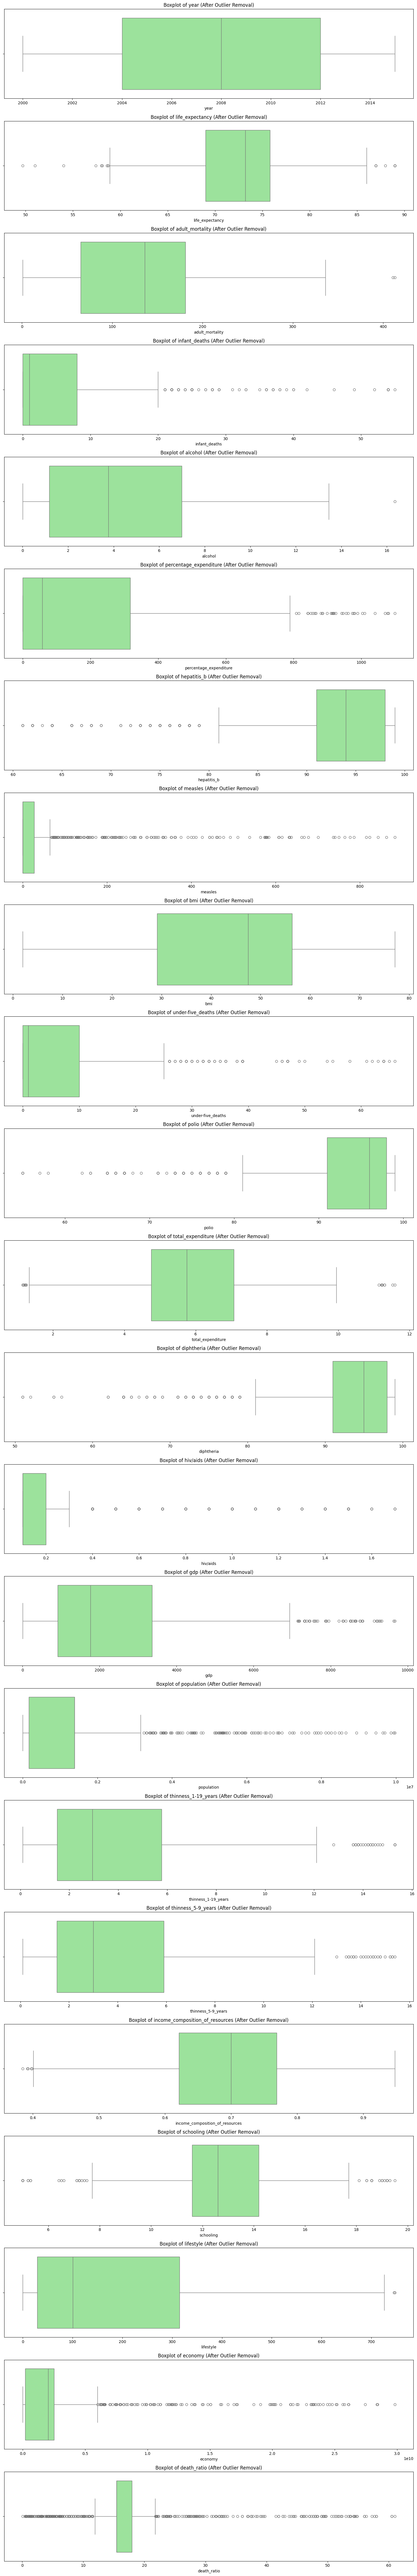

In [44]:
# Step 0: Use only numeric data
numeric_df = df.select_dtypes(include='number')

# Step 1: Boxplots before removing outliers
plt.figure(figsize=(15, len(numeric_df.columns) * 4))
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(len(numeric_df.columns), 1, i)
    sns.boxplot(x=numeric_df[col], color='skyblue')
    plt.title(f'Boxplot of {col} (Before Outlier Removal)')
    plt.tight_layout()
plt.show()

# Step 2: Remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

df_cleaned = remove_outliers_iqr(numeric_df)

# Step 3: Boxplots after removing outliers
plt.figure(figsize=(15, len(df_cleaned.columns) * 4))
for i, col in enumerate(df_cleaned.columns, 1):
    plt.subplot(len(df_cleaned.columns), 1, i)
    sns.boxplot(x=df_cleaned[col], color='lightgreen')
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.tight_layout()
plt.show()

Perform data analysis to answer the following questions:

* Should a country having a lower life expectancy value (<65) increase its healthcare expenditure to improve its average lifespan?

* What is the impact of schooling on the lifespan of humans?

* Does Life Expectancy have a positive or negative relationship with drinking alcohol?

* Do densely populated countries tend to have a lower life expectancy?

In [96]:
# Create a new column where life expectancy and expenditure is less than 65
df['life_expectancy_less_than_65'] = df['life_expectancy'].apply(lambda x: x if x < 65 else None)
df['percentage_expenditure_less_than_65'] = df['percentage_expenditure'].apply(lambda x: x if x < 65 else None)

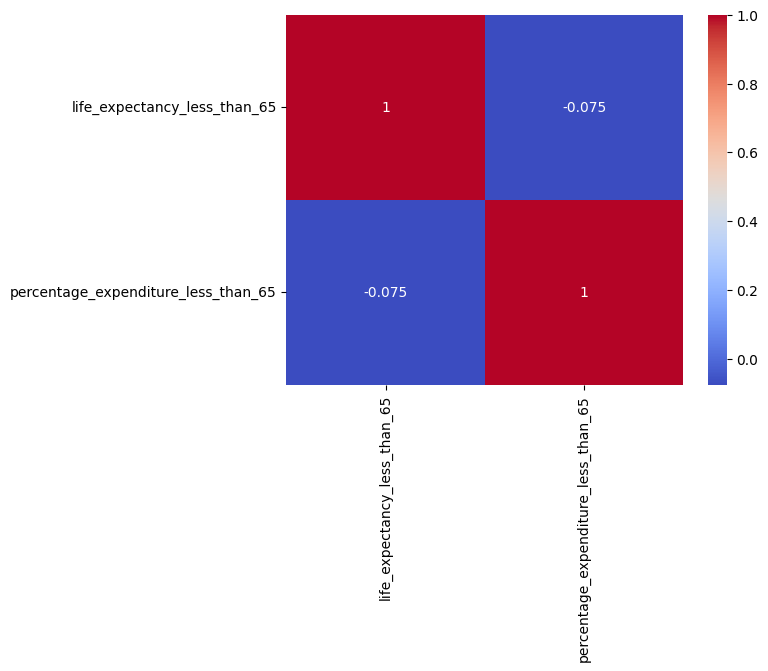

Correlation between life expectancy and healthcare expenditure for countries with life expectancy < 65: 0.012085545644473094


In [97]:
# Calculate the correlation between life expectancy and healthcare expenditure
sns.heatmap(df[['life_expectancy_less_than_65', 'percentage_expenditure_less_than_65']].corr(), annot=True, cmap='coolwarm')
plt.show()
print(f"Correlation between life expectancy and healthcare expenditure for countries with life expectancy < 65: {correlation}")


This indicate very weak relationship which means increase in health care expenditure has a almost no longer life expectancy.

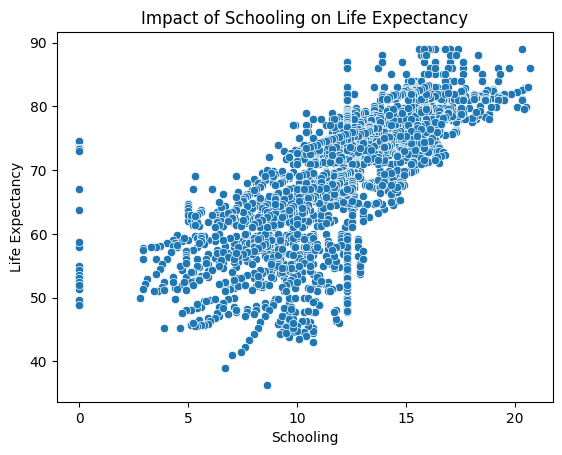

In [98]:
# impact of schooling in life expectancy
sns.scatterplot(x=df['schooling'], y=df['life_expectancy'])
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Impact of Schooling on Life Expectancy')
plt.show()

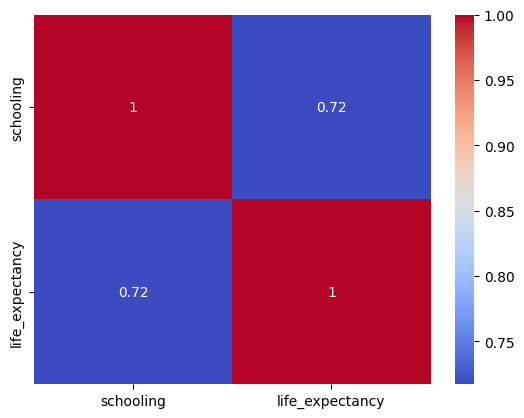

In [99]:
# create a heatmap of correlation with schooling and life expectancy
sns.heatmap(df[['schooling', 'life_expectancy']].corr(), annot=True, cmap='coolwarm')
plt.show()

looking at the scatterplot and heatmap of correlation between schooling and life expentency, we can conclude that they have a linear relationship. life expectancy of people increases with the increase of people who attends school.

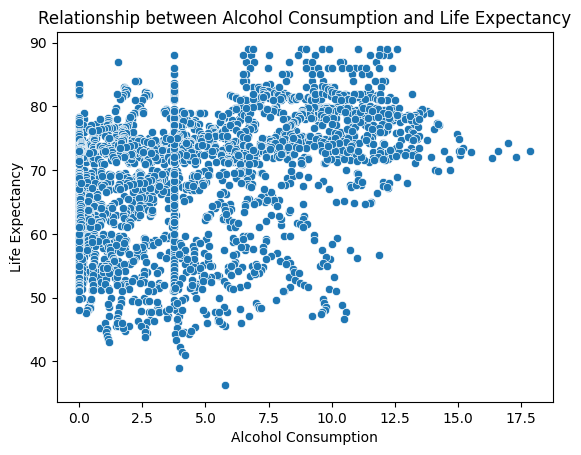

Correlation between alcohol consumption and life expectancy: 0.3906736980539193


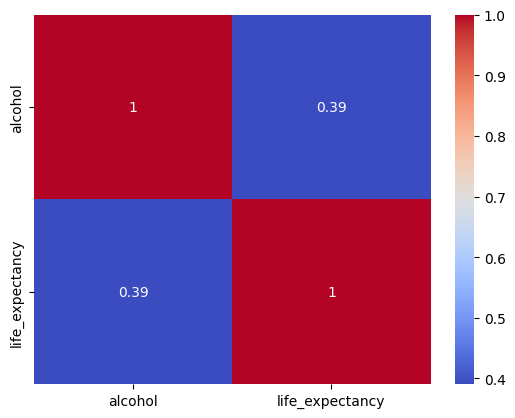

In [100]:

# relationship between Life Expectancy and Alcohol Consumption
sns.scatterplot(x=df['alcohol'], y=df['life_expectancy'])
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.title('Relationship between Alcohol Consumption and Life Expectancy')
plt.show()

correlation = df['alcohol'].corr(df['life_expectancy'])
print(f"Correlation between alcohol consumption and life expectancy: {correlation}")

sns.heatmap(df[['alcohol', 'life_expectancy']].corr(), annot=True, cmap='coolwarm')
plt.show()


Alcohol does not show any significant impact on life expectancy. However, from scatterplot we can see that high amount of alcohol comsumption has high life expectancy which seems surprising.

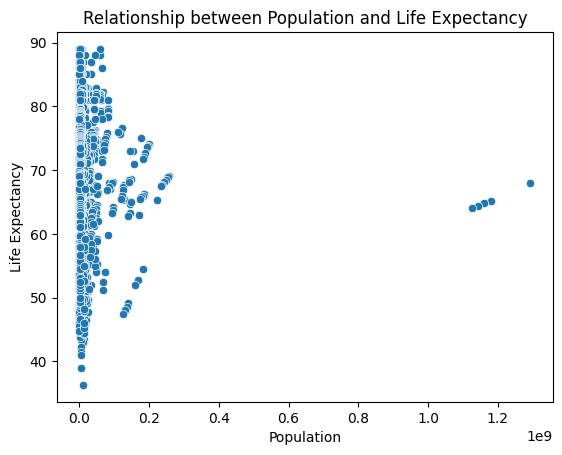

Correlation between population consumption and life expectancy: -0.02884594400253534


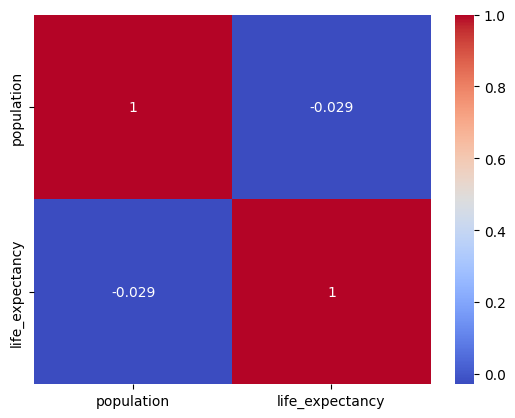

In [102]:
# Do densely populated countries tend to have a lower life expectancy?
sns.scatterplot(x=df['population'], y=df['life_expectancy'])
plt.xlabel('Population')
plt.ylabel('Life Expectancy')
plt.title('Relationship between Population and Life Expectancy')
plt.show()

correlation = df['population'].corr(df['life_expectancy'])
print(f"Correlation between population and life expectancy: {correlation}")

sns.heatmap(df[['population', 'life_expectancy']].corr(), annot=True, cmap='coolwarm')
plt.show()


Correlation coefficient is -0.029 between life expectancy and population means rise in population decrease the life expectancy.

# Lets start working on Task 6

Split the remaining data into around 75% for training and 25% for the test set. Train the linear regression model and assess the performance on the training set, test set, and the entire dataset.

For assessing model performance, use various metrics such as Root Mean Square Error (RMSE), Mean Absolute Percentage Error (MAPE), and R2 Score.

Draw a residual scatter plot between the target variable on the x-axis and predicted values on the y-axis. The scatter plot should contain an ideal unity line that represents the cases when predicted values are the same as target values. The plot will contain dotted error lines corresponding to +/- 5 colored as yellow and +/- 10 years colored as red. These lines will provide easier visualization of data performance to see data scatter.
Draw residual histogram.
Perform appropriate cross-validation to check if the linear regression model has data overfit. Generate a box plot to display model performance for each fold. Also, determine the mean and standard deviation of overall performance.

In [106]:
# lets split the data into training and test set


In [126]:
features = ['year', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
            'lifestyle', 'economy', 'death_ratio']
X = df.loc[:,features]
y = df.loc[:,predictor]

We will use Scikit learn train_test_split() method to acomplish this.

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

This will split the data where training is 75 percent and testing is 25 percent.

Now lets use linear regression model to compute the performance.

In [128]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

Lets import metrics and calculate Root Mean Square Error (RMSE), Mean Absolute Percentage Error (MAPE), and R2 Score.

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Evaluate the model performance on the validation set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = linear_regression.score(X_test, y_test)
# mape using skitlearn
mape = mean_absolute_percentage_error(y_test, y_pred)


# Print the evaluation metrics on the validation set
print("Validation Set:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Mean Absolute Percentage Error:", mape)


Validation Set:
Mean Squared Error: 3.207415203050172e-07
Root Mean Squared Error: 0.0005663404632418711
R-squared: 0.9999999965502021
Mean Absolute Percentage Error: 4.264022107276548e-06


Draw a residual scatter plot between the target variable on the x-axis and predicted values on the y-axis. The scatter plot should contain an ideal unity line that represents the cases when predicted values are the same as target values. The plot will contain dotted error lines corresponding to +/- 5 colored as yellow and +/- 10 years colored as red. These lines will provide easier visualization of data performance to see data scatter

Text(0.5, 1.0, 'Residual Plot: Actual vs Predicted')

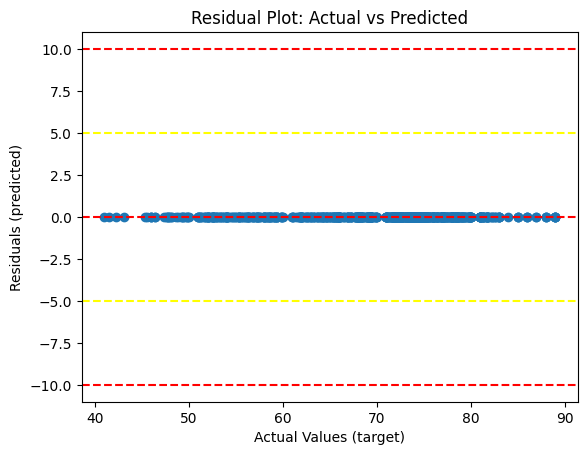

In [151]:
residuals = y_test - y_pred
#plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=5, color='yellow', linestyle='--', label="±5 Years (Yellow)")
plt.axhline(y=-5, color='yellow', linestyle='--')
plt.axhline(y=10, color='red', linestyle='--', label="±10 Years (Red)")
plt.axhline(y=-10, color='red', linestyle='--')
plt.xlabel('Actual Values (target)')
plt.ylabel('Residuals (predicted)')
plt.title('Residual Plot: Actual vs Predicted')

Draw residual histogram.


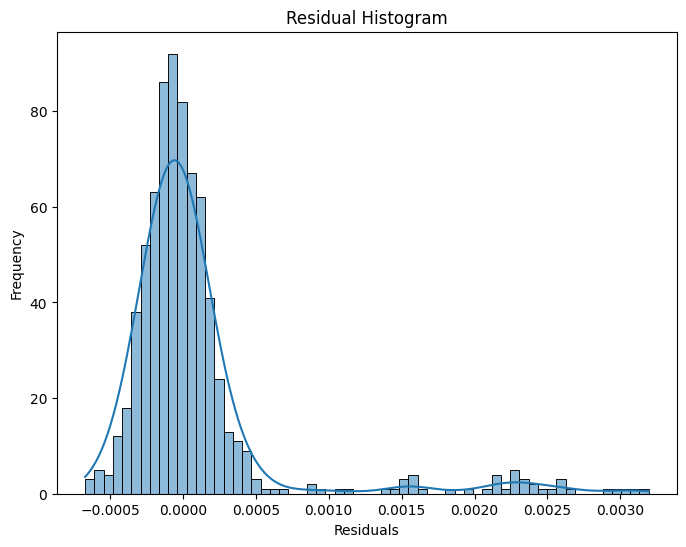

In [146]:
# draw a residual histrogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()


Lets apply 10 fold cross validation to check if the linear regression model has data overfit

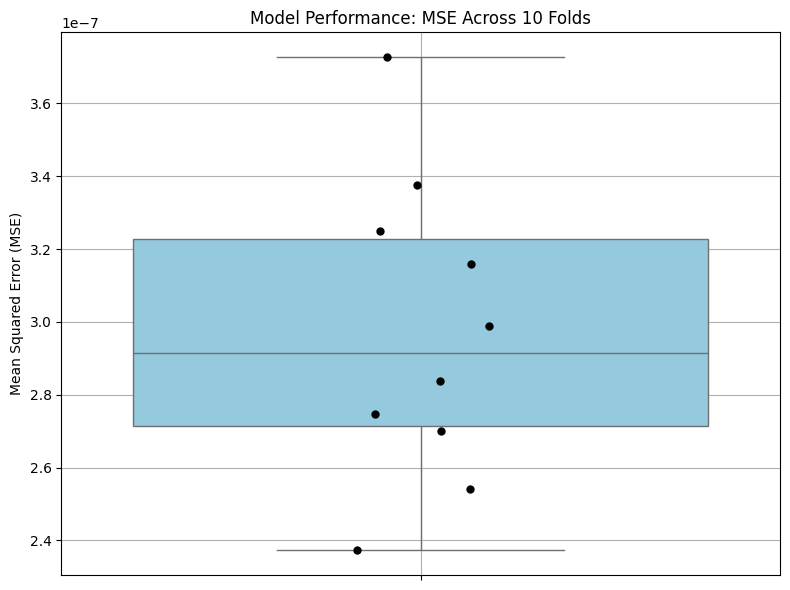

Mean MSE: 2.970337210052886e-07 3
Standard Deviation of MSE: 3.914613423339692e-08 3


In [156]:
from sklearn.model_selection import cross_val_score, KFold

# Perform 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = -cross_val_score(linear_regression, X, y, cv=kf, scoring='neg_mean_squared_error')

# converting score into dataframe
mse_df = pd.DataFrame({'Fold': [f'Fold {i+1}' for i in range(10)], 'MSE': mse_scores})

# Plot boxplot of cross-validation MSE scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=mse_df, y='MSE', color='skyblue')
sns.stripplot(data=mse_df, y='MSE', color='black', size=6, jitter=True)
plt.title('Model Performance: MSE Across 10 Folds')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display mean and std deviation of MSE
print("Mean MSE:", np.mean(mse_scores), 3)
print("Standard Deviation of MSE:", np.std(mse_scores), 3)

From above result, we see that MSE values are extremely low meaning predictions are close to actual values.
standard deviation is also very small indicating that model's performance is conistent across folds.

Determine the minimum number of features and which features need to be included to ensure that all the data is bound within the error lines mentioned above.

For this, I am going to use a F-test for feature selection because our values are continues.

Top 10 Features (f_regression):
                            Feature      F Score
19                        schooling  3101.262043
2                   adult_mortality  2754.630090
18  income_composition_of_resources  2638.411448
8                               bmi  1329.109505
13                         hiv/aids  1313.073691
20                        lifestyle   863.423436
12                       diphtheria   844.534084
16              thinness_1-19_years   819.959449
17               thinness_5-9_years   796.835779
10                            polio   782.971403


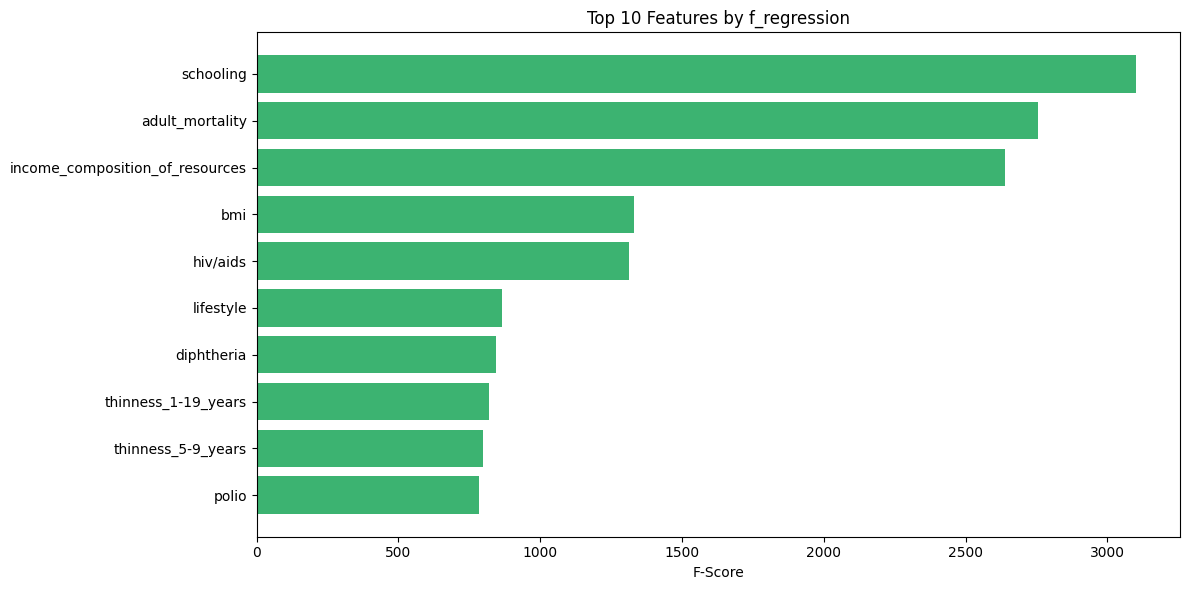

In [162]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use f_regression for regression target
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_scaled, y)
# Feature scores
f_scores = pd.DataFrame({
    'Feature': X.columns,
    'F Score': selector.scores_
}).sort_values(by='F Score', ascending=False)

# Display top features
print("Top 10 Features (f_regression):")
print(f_scores.head(10))

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(f_scores['Feature'].head(10), f_scores['F Score'].head(10), color='mediumseagreen')
plt.xlabel("F-Score")
plt.title("Top 10 Features by f_regression")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()